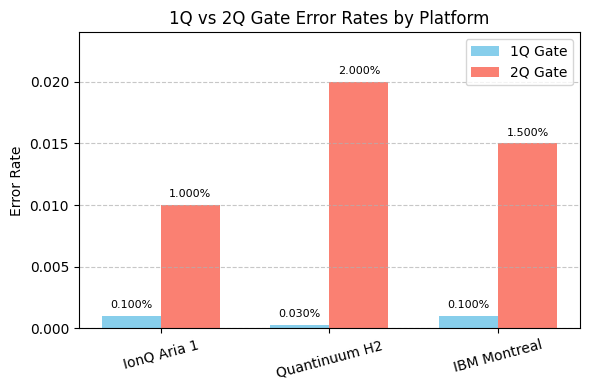

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Fidelity values
data = {
    "Platform": ["IonQ Aria 1", "Quantinuum H2", "IBM Montreal"],
    "1Q Gate Error Rate": [1 - 0.999, 1 - 0.9997, 1 - 0.999],
    "2Q Gate Error Rate": [1 - 0.99, 1 - 0.98, 1 - 0.985],
}

df = pd.DataFrame(data)

# Create grouped bar plot
x = range(len(df["Platform"]))
bar_width = 0.35

fig, ax = plt.subplots(figsize=(6, 4))
bars1 = ax.bar([i - bar_width/2 for i in x], df["1Q Gate Error Rate"],
               bar_width, label="1Q Gate", color="skyblue")
bars2 = ax.bar([i + bar_width/2 for i in x], df["2Q Gate Error Rate"],
               bar_width, label="2Q Gate", color="salmon")

# Axes and Labels
y_max = max(df["2Q Gate Error Rate"]) * 1.2
ax.set_ylim(0, y_max)
ax.set_xticks(x)
ax.set_xticklabels(df["Platform"], rotation=15)
ax.set_ylabel("Error Rate")
ax.set_title("1Q vs 2Q Gate Error Rates by Platform")
ax.legend()
ax.grid(axis="y", linestyle="--", alpha=0.7)

# Annotate bars with percentage labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3%}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 4),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.savefig("plots/fidelity_error_rates_plot.png", dpi=300)
plt.show()